In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sms = r'C:\Users\Riaz\Desktop\pandas\Message_Classifier\spam.csv'
sms = pd.read_csv(sms)
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


-There are few steps we have to accomplish to complete this prjoect
1. Data cleaning
2. EDA
3. Text Processing
4. Model Building
5. Evaluation
6. Improvemnet
7. Website
8. Deployment

### 1.Data Cleaning

In [3]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# here we can see that there are lots of null values in last three colmn. So we can drop this null values

sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [5]:
sms

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# Renaming the columns V1 & V2...
# Here ham means Good mail & spam means junk mails...

sms.rename(columns={'v1':"Target","v2":"Text"}, inplace = True)
sms.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# As our target values contains only two categoreis so we can encode the taret values...

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

sms['Target'] = encoder.fit_transform(sms['Target'])

sms.head()

# ham = "0" & spam = "1" ...

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# now checkin the duplicats values and delet these values...

sms.drop_duplicates(keep='first')



,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### EDA

In [9]:
# checking the ham and spam values...

sms['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

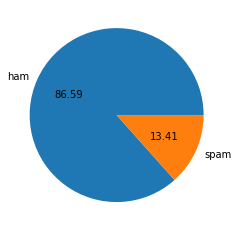

In [10]:
plt.pie(sms['Target'].value_counts(),autopct="%.2f",labels=['ham','spam'])
plt.show()

In [11]:
# It is clearly seen that this dataset is imbalanced... & as our values is text base so we have to perform those text individally like countin number of charecter , number of words & number of snettence
# To do that we have to import nltk library

import nltk

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Riaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
sms['Number of cherecter'] = sms['Text'].apply(len)

In [14]:
sms.head()

,Target,Text,Number of cherecter
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
sms['Number of word'] = sms['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
sms.head()

,Target,Text,Number of cherecter,Number of word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [16]:
sms['Number of sentence'] = sms['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))
sms.head()

,Target,Text,Number of cherecter,Number of word,Number of sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
# Now we will check the statistical method of spam and ham ...

sms[sms['Target'] == 0] [['Number of cherecter','Number of word','Number of sentence']].describe()

,Number of cherecter,Number of word,Number of sentence
count,4825.000000,4825.000000,4825.000000
mean,71.021347,17.275233,1.832332
std,58.014768,13.983425,1.431214
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
sms[sms['Target'] == 1] [['Number of cherecter','Number of word','Number of sentence']].describe()

,Number of cherecter,Number of word,Number of sentence
count,747.000000,747.000000,747.000000
mean,138.429719,27.902276,3.030790
std,29.049857,6.871851,1.546548
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='Number of cherecter', ylabel='Count'>

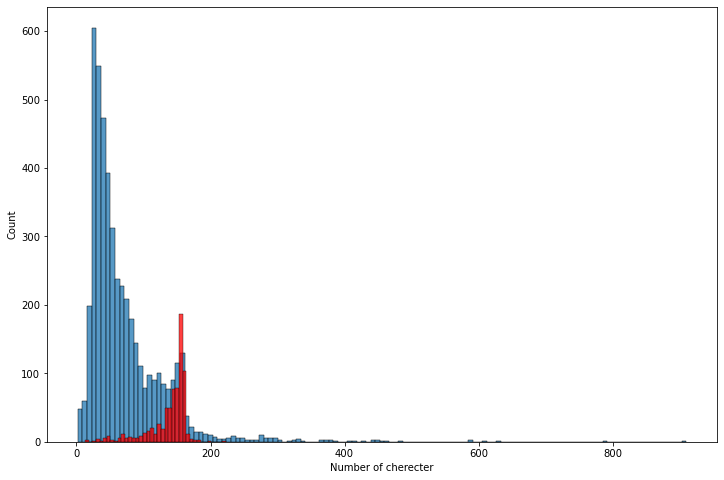

In [19]:
# let's see the historam of these ....

plt.figure(figsize=(12,8))
sns.histplot(sms[sms['Target'] == 0]['Number of cherecter'])
sns.histplot(sms[sms['Target'] == 1]['Number of cherecter'],color= 'red')

<AxesSubplot:xlabel='Number of word', ylabel='Count'>

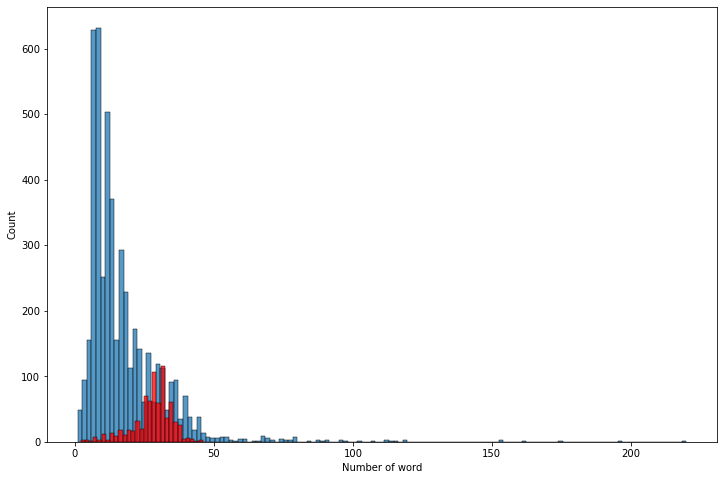

In [20]:
plt.figure(figsize=(12,8))
sns.histplot(sms[sms['Target'] == 0]['Number of word'])
sns.histplot(sms[sms['Target'] == 1]['Number of word'],color= 'red')

<AxesSubplot:xlabel='Number of sentence', ylabel='Count'>

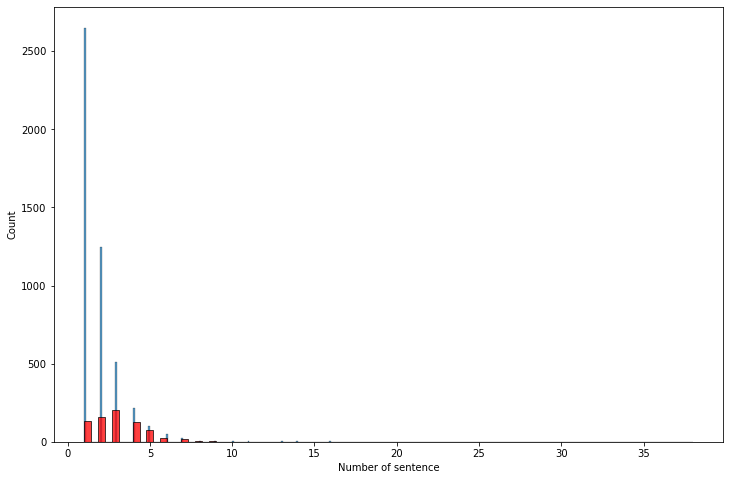

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(sms[sms['Target'] == 0]['Number of sentence'])
sns.histplot(sms[sms['Target'] == 1]['Number of sentence'],color= 'red')

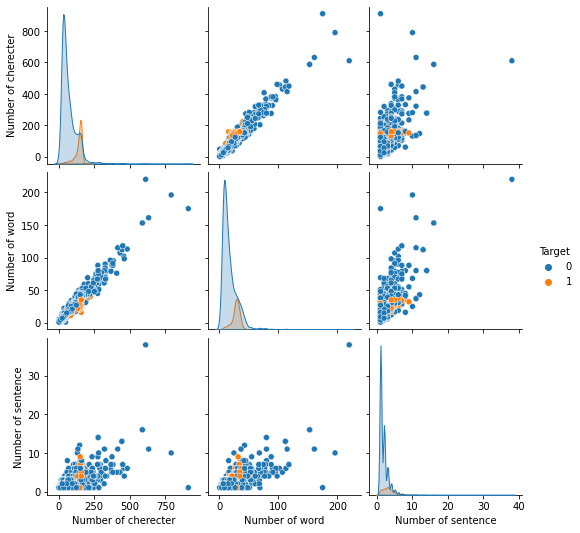

In [22]:
sns.pairplot(sms, hue = 'Target')

<AxesSubplot:>

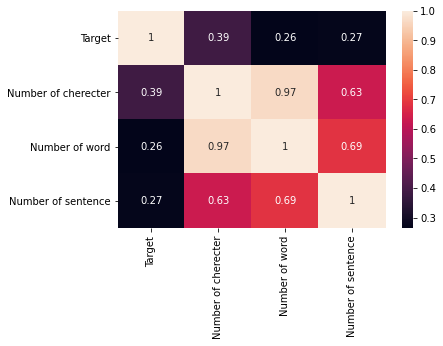

In [23]:
sns.heatmap(sms.corr(),annot =True)

### Data preprocessing (for Textual Data) ...
- Lower case
- Tokenization
- Removing special cherecter
- Removing stop words & puntuation
- Stemming

In [24]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text) # word_tokenize makes split the text into word
  
    # Removing special cherecter ...  
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
 # Removig stop words and puntuation ...
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # stemming
     
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    
    return " ".join(y)


In [25]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Riaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [28]:
transform_text("I love machine learning ver much @ going how about you ?")

'love machin learn ver much go'

In [29]:
sms['Transform text'] = sms['Text'].apply(transform_text)

In [30]:
sms.head()

,Target,Text,Number of cherecter,Number of word,Number of sentence,Transform text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
### At this momnet we will check the most common words used in ham and spam ...
spam_corpus =[]
for msg in sms[sms['Target'] == 1] ['Transform text'].tolist(): # taking the spam msg and make it as list
    for word in msg.split(): # spliting the list into word
        spam_corpus.append(word)

In [32]:
pd.DataFrame(spam_corpus)

,0
0,free
1,entri
2,2
3,wkli
4,comp
...,...
11490,087187272008
11491,now1
11492,10p
11493,per


In [33]:
len(spam_corpus)

11495

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


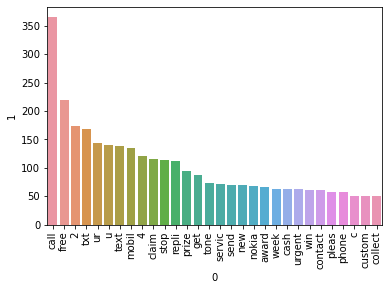

In [34]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
ham_corpus =[]
for msg in sms[sms['Target'] == 0] ['Transform text'].tolist(): # taking the spam msg and make it as list
    for word in msg.split(): # spliting the list into word
        ham_corpus.append(word)

In [36]:
pd.DataFrame(ham_corpus)

,0
0,go
1,jurong
2,point
3,crazi
4,avail
...,...
38112,us
38113,free
38114,rofl
38115,true


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


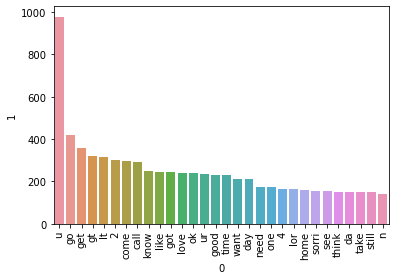

In [37]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [38]:
# As our data is text based so we need to convert into numerical values throuh vectorization ...

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

#### using countvectorizer

In [39]:
x = cv.fit_transform(sms['Transform text']).toarray()

In [40]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
x.shape

(5572, 6677)

In [42]:
y = sms['Target'].values

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, Y_train, y_test = train_test_split(x,y, test_size =.2, random_state = 2)

In [46]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [47]:
gnb = GaussianNB()
mulnb = MultinomialNB()
bernb = BernoulliNB()

In [48]:
# using GaussianNB algo...

gnb.fit(X_train,Y_train)
y_1_predict = gnb.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test,y_1_predict))
print("Confussion matrix is: ", confusion_matrix(y_test,y_1_predict))
print("Precisson Score is: ", precision_score(y_test,y_1_predict))

Accuracy score is:  0.8717488789237668
Confussion matrix is:  [[841 116]
 [ 27 131]]
Precisson Score is:  0.5303643724696356


In [49]:
# using Multinomial naive bayes algo ...

mulnb.fit(X_train,Y_train)
y_2_predict = mulnb.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test,y_2_predict))
print("Confussion matrix is: ", confusion_matrix(y_test,y_2_predict))
print("Precisson Score is: ", precision_score(y_test,y_2_predict))

Accuracy score is:  0.9721973094170404
Confussion matrix is:  [[943  14]
 [ 17 141]]
Precisson Score is:  0.9096774193548387


In [50]:
# using Burnolli naive Bayes algo ...

bernb.fit(X_train,Y_train)
y_3_predict = bernb.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test,y_3_predict))
print("Confussion matrix is: ", confusion_matrix(y_test,y_3_predict))
print("Precisson Score is: ", precision_score(y_test,y_3_predict))

Accuracy score is:  0.9695067264573991
Confussion matrix is:  [[956   1]
 [ 33 125]]
Precisson Score is:  0.9920634920634921


- from above code it is clearly seen that using countVectorizer bernolinb gives the more precision score compare than ohter naive bayes. So we will take bernolinb among these.

#### usin tidif

In [51]:
tfidf_x = tfidf.fit_transform(sms['Transform text']).toarray()

In [52]:
tfidf_x = tfidf.fit_transform(sms['Transform text']).toarray()

In [53]:
y = sms['Target'].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(tfidf_x,y, test_size =.2, random_state = 2)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [56]:
gnb = GaussianNB()
mulnb = MultinomialNB()
bernb = BernoulliNB()

In [57]:

gnb.fit(X_train,Y_train)
y_1_predict = gnb.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test,y_1_predict))
print("Confussion matrix is: ", confusion_matrix(y_test,y_1_predict))
print("Precisson Score is: ", precision_score(y_test,y_1_predict))

Accuracy score is:  0.8618834080717489
Confussion matrix is:  [[836 121]
 [ 33 125]]
Precisson Score is:  0.508130081300813


In [58]:
mulnb.fit(X_train,Y_train)
y_2_predict = mulnb.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test,y_2_predict))
print("Confussion matrix is: ", confusion_matrix(y_test,y_2_predict))
print("Precisson Score is: ", precision_score(y_test,y_2_predict))

Accuracy score is:  0.9641255605381166
Confussion matrix is:  [[956   1]
 [ 39 119]]
Precisson Score is:  0.9916666666666667


In [59]:
bernb.fit(X_train,Y_train)
y_3_predict = bernb.predict(X_test)
print("Accuracy score is: ", accuracy_score(y_test,y_3_predict))
print("Confussion matrix is: ", confusion_matrix(y_test,y_3_predict))
print("Precisson Score is: ", precision_score(y_test,y_3_predict))

Accuracy score is:  0.9748878923766816
Confussion matrix is:  [[955   2]
 [ 26 132]]
Precisson Score is:  0.9850746268656716


- from above code it is clearly seen that using tfidf, mulnb gives the  more precision score compare than ohter naive bayes. So we will take mulnb among these and finnaly bteween two method we will choose tfidf

In [60]:
import pickle
pickle.dump(tfidf,open('vectorize.pkl','wb'))
pickle.dump(mulnb,open('model.pkl','wb'))